In [1]:
from fastai.vision.all import *

# from accelerate import notebook_launcher
# from accelerate.utils import write_basic_config

# write_basic_config()

# set_seed(99, True)


import pandas as pd
import timm

from torch import nn
import torch

from train_head_with_fastai import *

/root/fastai/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Configuration already exists at /root/.cache/huggingface/accelerate/default_config.yaml, will not override. Run `accelerate config` manually or pass a different `save_location`.


In [2]:
# Finetune with swin
# epoch     train_loss  valid_loss  error_rate  time    
# 0         1.455830    1.108046    0.436721    00:44                                                                                                  
# epoch     train_loss  valid_loss  error_rate  time    
# 0         1.089579    1.036944    0.412077    00:42                                                                                                   
# 1         1.047113    0.983579    0.393302    00:43                                                                                                   
# 2         1.010313    0.947087    0.384290    00:42                                                                                                   
# 3         0.967017    0.927662    0.375501    00:43                                                                                                   
# 4         0.931427    0.917535    0.371384    00:43                                                                                                   
# 5         0.898673    0.912389    0.366322    00:43                                                                                                   
# 6         0.870328    0.911080    0.365460    00:43                                                                                                   
# 7         0.845688    0.910079    0.363123    00:43                                                                                                   
# 8         0.830724    0.908271    0.363624    00:43                                                                                                   
# 9         0.819366    0.907496    0.362150    00:43

In [3]:
# Finetune with vicreg convnext_small
# OVERFITTING
# epoch     train_loss  valid_loss  error_rate  time    
# 0         1.822088    1.804670    0.443369    00:46                                                                                                  
# epoch     train_loss  valid_loss  error_rate  time    
# 0         1.136192    1.024989    0.387990    00:44                                                                                                   
# 1         1.063561    1.028237    0.385848    00:44                                                                                                   
# 2         1.018938    0.975775    0.376891    00:45                                                                                                   
# 3         0.955491    0.938137    0.376446    00:44                                                                                                   
# 4         0.893484    0.968489    0.371607    00:44                                                                                                   
# 5         0.811158    1.000140    0.374277    00:44                                                                                                   
# 6         0.718600    1.040166    0.379589    00:44                                                                                                   
# 7         0.625757    1.110672    0.383511    00:45                                                                                                   
# 8         0.541888    1.157093    0.385764    00:44                                                                                                   
# 9         0.493512    1.154509    0.385180    00:45

In [4]:
# Only head (fastai head)
# 9         1.088608    1.020769    0.407182    00:27                                                                                           
# 10        1.075222    1.016949    0.406792    00:27                                                                                           
# 11        1.064281    1.009055    0.403204    00:27                                                                                           
# 12        1.053032    1.007849    0.403872    00:27                                                                                           
# 13        1.050570    1.005674    0.402787    00:27                                                                                           
# 14        1.041028    0.999172    0.401118    00:27                                                                                           
# 15        1.034649    0.999105    0.401368    00:27                                                                                           
# 16        1.029837    1.000037    0.401814    00:27                                                                                           
# 17        1.026638    0.997905    0.400701    00:27                                                                                           
# 18        1.024461    0.997456    0.399950    00:27                                                                                           
# 19        1.021388    0.997773    0.399978    00:27

In [5]:
# Optuna run for RG
# Best trial:
#   Value: 0.8015913963317871
#   Params: 
#     batch_size: 531
#     lr: 0.002068871320940098
#     n_epochs: 37
#     dp1: 0.04218613370652826
#     dp2: 0.1644558627844514
#     size_of_linear_layer: 330

In [6]:
# Optuna run for RCR
# Number of finished trials: 80
# Best trial:
#   Value: 0.589007556438446
#   Params: 
#     batch_size: 256
#     lr: 0.004039145922107343
#     n_epochs: 16
#     dp1: 0.05020119995575556
#     dp2: 0.3885382191500471
#     size_of_linear_layer: 228

In [8]:
learn = load_learner("0_rcr_evaluation_imagenet_vicregl", cpu=False)

In [9]:
data_path = "/data/dino_fixed_rg_evaluation_imagenet/"

In [10]:
data_path = "/data/rcr_evaluation_imagenet/"

In [11]:
lbl_dict = get_lbl_dict(data_path)

In [12]:
learn.dls = get_dataloaders(lbl_dict, data_path, config={'batch_size': 256, 'stratified_batches': False})

/root/fastai/lib/python3.10/site-packages/fastai/data/transforms.py:225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(col):


In [13]:
ci = ClassificationInterpretation.from_learner(learn)

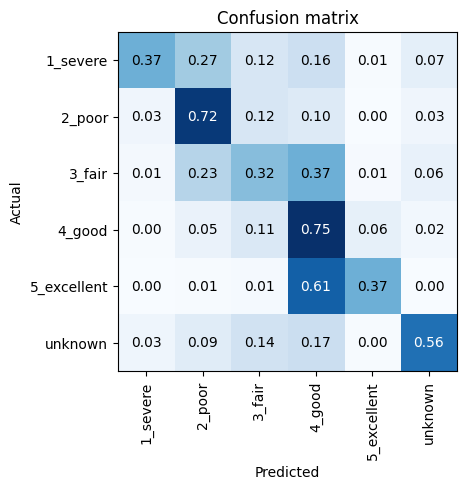

In [14]:
fig = ci.plot_confusion_matrix(normalize=True)

In [15]:
c = ci.confusion_matrix()

In [16]:
c / c.sum(axis=1)

array([[0.24933827, 0.12682744, 0.0110883 , 0.00352889, 0.05999439,
        0.01764859],
       [0.3223928 , 0.64138448, 0.06201232, 0.04852228, 0.33837959,
        0.01323644],
       [0.29804129, 0.54104711, 0.06433949, 0.04119982, 0.38239417,
        0.02880872],
       [0.14399153, 0.85530426, 0.11444216, 0.09219232, 0.62601626,
        0.02699195],
       [0.01005823, 0.24028489, 0.04312115, 0.05152184, 0.20213064,
        0.00129769],
       [0.17628375, 0.21741847, 0.01724846, 0.00652845, 0.1247547 ,
        0.29457566]])

In [17]:
from sklearn.metrics import ConfusionMatrixDisplay

In [18]:
c.sum()

35952

In [19]:
accuracy = c.diagonal().sum() / c.sum()

Text(0.5, 0.98, 'Precision\n(accuracy: 25.0 %)')

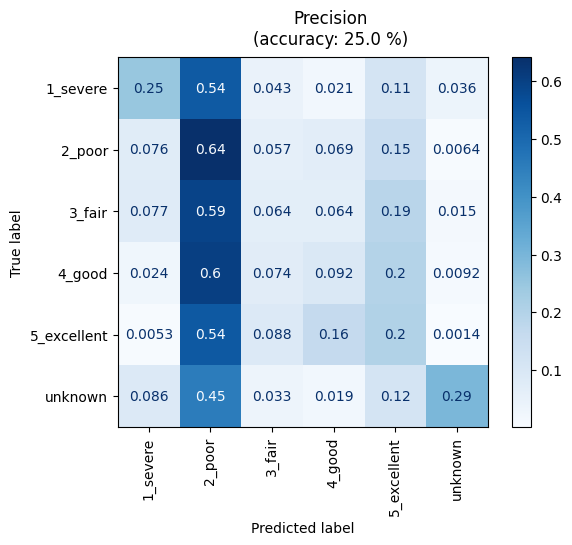

In [25]:
fig, sub = plt.subplots()
row_sums = c.sum(axis=1)
row_sums_matrix = np.tile(row_sums[:, np.newaxis], (1, c.shape[1])) 
ConfusionMatrixDisplay(c / row_sums_matrix, display_labels=ci.vocab).plot(cmap='Blues', xticks_rotation='vertical', ax=sub)

fig.suptitle(f"Precision\n(accuracy: {accuracy * 100:.1f} %)")

In [44]:
fig.savefig("recall_cm.png", bbox_inches='tight')

<Axes: >

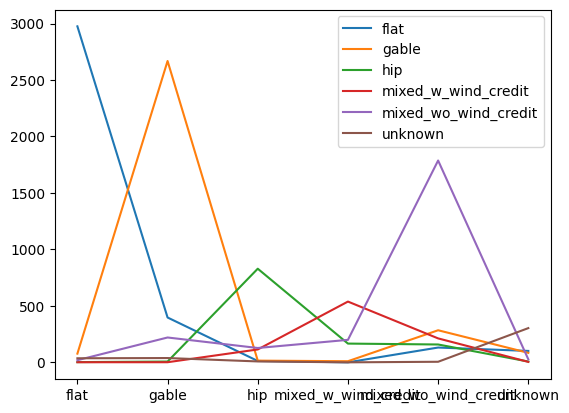

In [22]:
df = pd.DataFrame(c, index=ci.vocab, columns=ci.vocab)


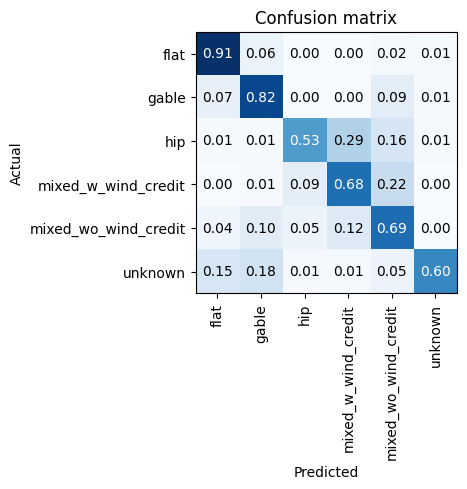

In [15]:
ci.plot_confusion_matrix(normalize=True)

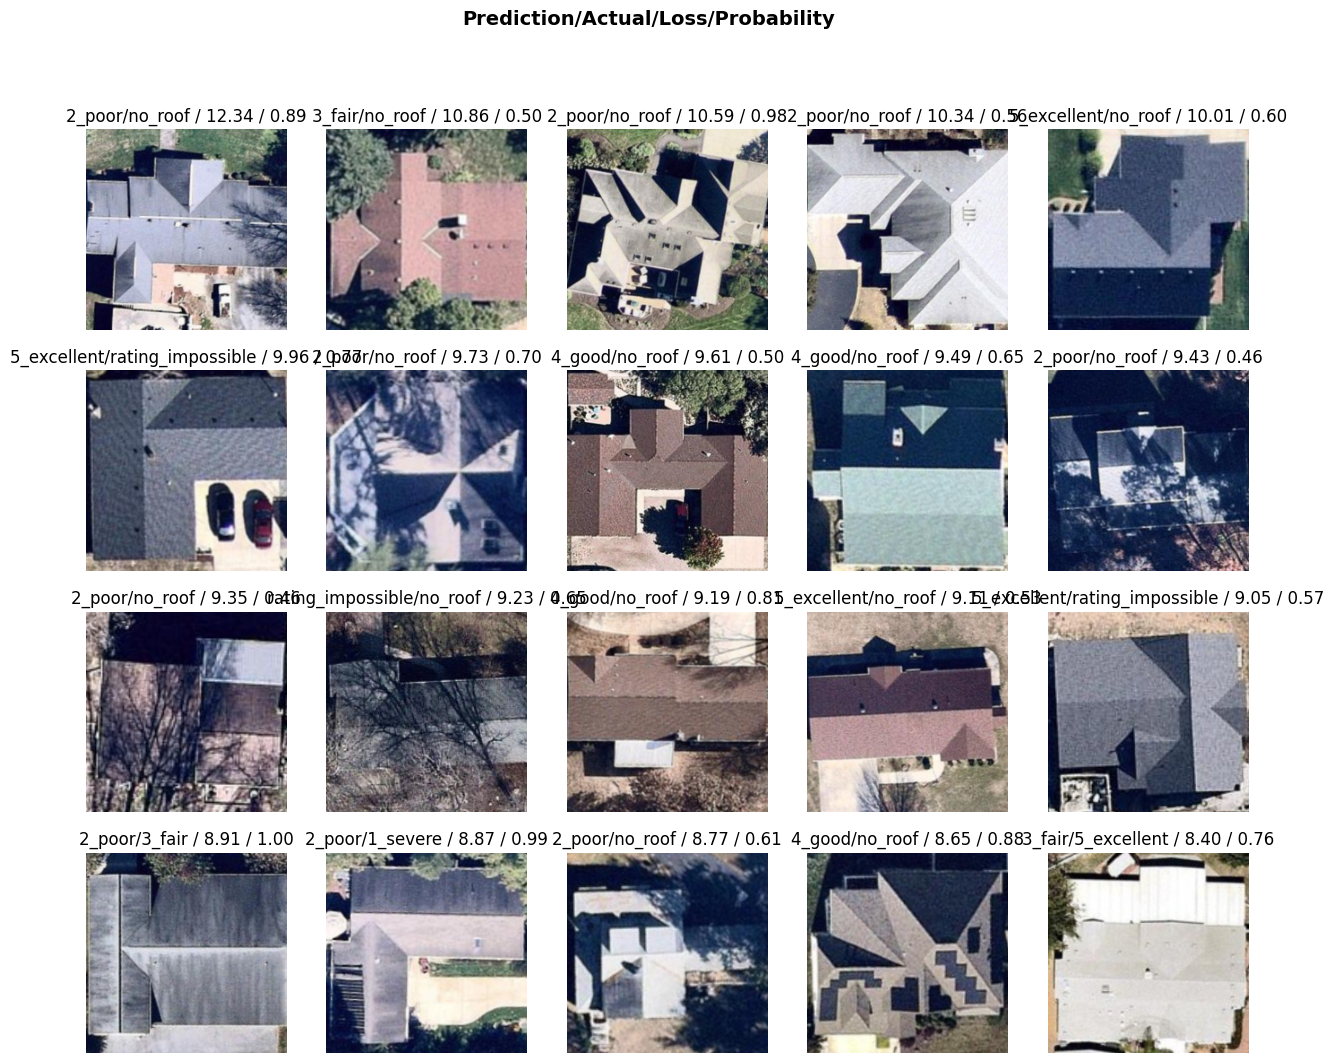

In [12]:
ci.plot_top_losses(20)

In [1]:
from train_head_with_fastai import *
import pandas as pd
import tqdm

/root/fastai/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Configuration already exists at /root/.cache/huggingface/accelerate/default_config.yaml, will not override. Run `accelerate config` manually or pass a different `save_location`.


In [3]:
df = pd.read_parquet("/data/rcr_v3_test/chips/dataset.parquet")

In [6]:
len(df.groupby(['attribute_geometry_id', 'imagery_source']))

9295

In [9]:
for _, grp_df in df.groupby(['attribute_geometry_id', 'imagery_source']):
    
    break

In [14]:
grp_df.geometry_labels.value_counts().to_dict()

{'2_poor': 10, '3_fair': 6, '4_good': 3}

In [15]:
grp_df['filename']

0     52/52308d02c80d2c47b6e574fef740a4bf97ef34b44a54fd99ad30308a2d0daae6.png
1     52/52308d02c80d2c47b6e574fef740a4bf97ef34b44a54fd99ad30308a2d0daae6.png
2     52/52308d02c80d2c47b6e574fef740a4bf97ef34b44a54fd99ad30308a2d0daae6.png
3     52/52308d02c80d2c47b6e574fef740a4bf97ef34b44a54fd99ad30308a2d0daae6.png
4     52/52308d02c80d2c47b6e574fef740a4bf97ef34b44a54fd99ad30308a2d0daae6.png
5     52/52308d02c80d2c47b6e574fef740a4bf97ef34b44a54fd99ad30308a2d0daae6.png
6     52/52308d02c80d2c47b6e574fef740a4bf97ef34b44a54fd99ad30308a2d0daae6.png
7     52/52308d02c80d2c47b6e574fef740a4bf97ef34b44a54fd99ad30308a2d0daae6.png
8     52/52308d02c80d2c47b6e574fef740a4bf97ef34b44a54fd99ad30308a2d0daae6.png
9     52/52308d02c80d2c47b6e574fef740a4bf97ef34b44a54fd99ad30308a2d0daae6.png
10    52/52308d02c80d2c47b6e574fef740a4bf97ef34b44a54fd99ad30308a2d0daae6.png
11    52/52308d02c80d2c47b6e574fef740a4bf97ef34b44a54fd99ad30308a2d0daae6.png
12    52/52308d02c80d2c47b6e574fef740a4bf97ef34b44a54fd99ad30308

In [11]:
grp_df.columns

Index(['attribute_geometry_id', 'contact_id', 'geometry', 'imagery_source',
       'imagery_date', 'label_vote_id', 'label_vote_status', 'geometry_id',
       'geometry_labels', 'filename', 'entry_hash'],
      dtype='object')

In [23]:
def get_items(path_tuple):

    train_path, val_path = path_tuple
    
    _paths = {
        'train': train_path,
        'val': val_path
    }
    
    train_votes = pd.read_parquet(f"{train_path}/chips/dataset.parquet")
    val_votes = pd.read_parquet(f"{val_path}/chips/dataset.parquet")

    rows = []

    for split, df in zip(['train', 'val'], [train_votes, val_votes]):
        
        groups = df.groupby(['attribute_geometry_id', 'imagery_source'])
        
        for _, grp_df in tqdm.tqdm(groups, total=len(groups)):

            rows.append(
                {
                    "label_counts": grp_df.geometry_labels.value_counts(),
                    "filename": f"{_paths[split]}/chips/{grp_df['filename'].iloc[0]}",
                    "is_valid": split == 'val'
                }
            )

    return pd.DataFrame(rows)


def get_x(row):
    
    return PILImage.create(row['filename'])

def get_y(row):
    
    # Return majority voting for now
    return row['label_counts'].idxmax()

    
dblock = DataBlock(
    blocks    = (ImageBlock, CategoryBlock),
    get_items = get_items,
    get_x     = get_x,
    get_y     = get_y,
    splitter  = ColSplitter("is_valid"),
    item_tfms = [AlbumentationsTransform(get_train_transforms(256, 224), get_valid_transforms(256, 224))], 
    batch_tfms = Normalize.from_stats(mean=[0.485, 0.456, 0.406],
                                      std=[0.229, 0.224, 0.225])
)

In [24]:
dls = dblock.dataloaders(('/data/rcr_v3_val/', '/data/rcr_v3_val/'))

100% 4479/4479 [00:00<00:00, 4965.39it/s]
100% 4479/4479 [00:00<00:00, 6866.46it/s]
/root/fastai/lib/python3.10/site-packages/fastai/data/transforms.py:225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(col):


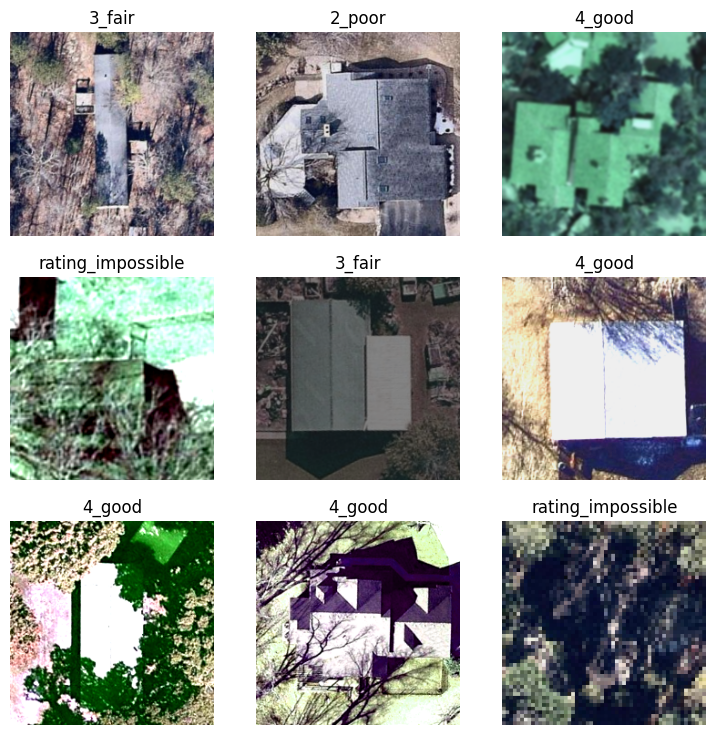

In [27]:
dls[0].show_batch()

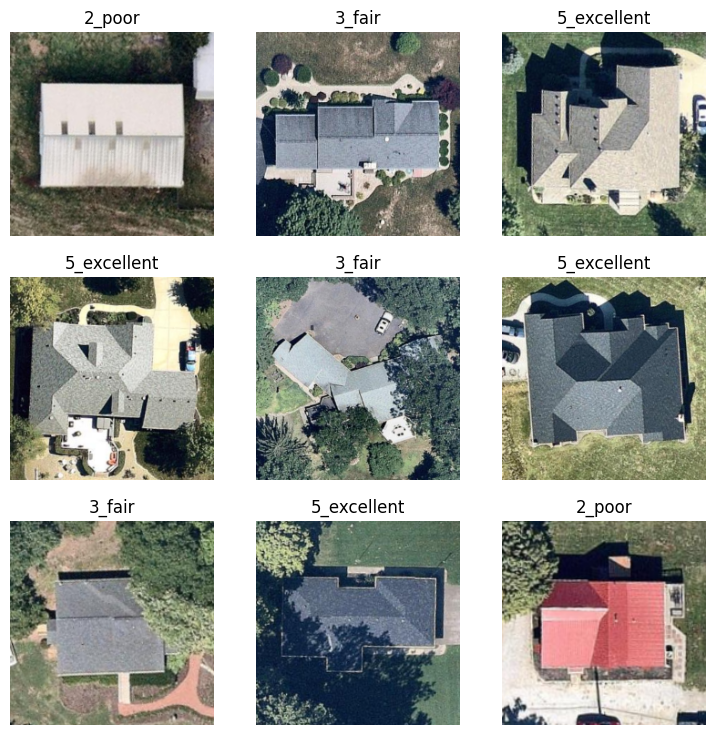

In [28]:
dls[1].show_batch()